In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

659

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04210c4e98be731b35089f9bbea2eb9c


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | sarkand
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | kysyl-syr
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | elizabeth city
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | beisfjord
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1

Processing Record 35 of Set 4 | praia da vitoria
Processing Record 36 of Set 4 | longyearbyen
Processing Record 37 of Set 4 | shirokiy
Processing Record 38 of Set 4 | yoichi
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | kapaa
Processing Record 41 of Set 4 | lubango
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | itapicuru
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | milingimbi
City not found. Skipping...
Processing Record 48 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 49 of Set 4 | jinchengjiang
City not found. Skipping...
Processing Record 50 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 1 of Set 5 | tirlyanskiy
Processing Record 2 of Set 5 | byron bay
Processing Record 3 of Set 5 | gameza
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | chapais
Proces

Processing Record 25 of Set 8 | yiyang
Processing Record 26 of Set 8 | mangrol
Processing Record 27 of Set 8 | itarema
Processing Record 28 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 29 of Set 8 | alekseyevka
Processing Record 30 of Set 8 | mandalgovi
Processing Record 31 of Set 8 | inirida
Processing Record 32 of Set 8 | palora
Processing Record 33 of Set 8 | sangar
Processing Record 34 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 35 of Set 8 | bouza
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | minbu
Processing Record 38 of Set 8 | galesong
Processing Record 39 of Set 8 | rimini
Processing Record 40 of Set 8 | bama
Processing Record 41 of Set 8 | rumoi
Processing Record 42 of Set 8 | boddam
Processing Record 43 of Set 8 | lillooet
Processing Record 44 of Set 8 | hearst
Processing Record 45 of Set 8 | biak
Processing Record 46 of Set 8 | canico
Processing Record 47 of Set 8 | yumen
Processing Record 48 of

Processing Record 12 of Set 12 | villarrica
Processing Record 13 of Set 12 | limon
Processing Record 14 of Set 12 | husavik
Processing Record 15 of Set 12 | alice springs
Processing Record 16 of Set 12 | mirina
City not found. Skipping...
Processing Record 17 of Set 12 | ust-kulom
Processing Record 18 of Set 12 | stokmarknes
Processing Record 19 of Set 12 | springbok
Processing Record 20 of Set 12 | ust-maya
Processing Record 21 of Set 12 | kolyvan
Processing Record 22 of Set 12 | porto novo
Processing Record 23 of Set 12 | benguela
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | ust-karsk
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | hanchuan
Processing Record 28 of Set 12 | dieppe
Processing Record 29 of Set 12 | antofagasta
Processing Record 30 of Set 12 | bosaso
Processing Record 31 of Set 12 | sambava
Processing Record 32 of Set 12 | antalaha
Processing Record 33 of Set 12 | sibolga
Processing Record 34 of Set 12 | s

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,77.00,88,14,8.05,CK,2020-09-12 17:01:28
1,Sarkand,45.41,79.92,65.30,27,97,14.79,KZ,2020-09-12 17:01:28
2,Bambous Virieux,-20.34,57.76,71.60,88,40,6.93,MU,2020-09-12 17:01:28
3,Kysyl-Syr,63.90,122.76,48.94,88,100,1.74,RU,2020-09-12 17:01:28
4,Saskylakh,71.92,114.08,41.20,79,50,3.62,RU,2020-09-12 16:59:47
5,Elizabeth City,36.29,-76.25,80.60,69,75,16.11,US,2020-09-12 17:01:28
6,Barrow,71.29,-156.79,32.00,92,90,9.17,US,2020-09-12 17:01:29
7,Dunedin,-45.87,170.50,53.01,50,100,4.27,NZ,2020-09-12 17:00:09
8,Nikolskoye,59.70,30.79,55.99,82,40,8.95,RU,2020-09-12 17:01:29
9,Jamestown,42.10,-79.24,71.01,68,1,9.17,US,2020-09-12 16:59:37


In [11]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        599 non-null    object 
 1   Lat         599 non-null    float64
 2   Lng         599 non-null    float64
 3   Max Temp    599 non-null    float64
 4   Humidity    599 non-null    int64  
 5   Cloudiness  599 non-null    int64  
 6   Wind Speed  599 non-null    float64
 7   Country     599 non-null    object 
 8   Date        599 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.2+ KB


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-09-12 17:01:28,-21.21,-159.78,77.00,88,14,8.05
1,Sarkand,KZ,2020-09-12 17:01:28,45.41,79.92,65.30,27,97,14.79
2,Bambous Virieux,MU,2020-09-12 17:01:28,-20.34,57.76,71.60,88,40,6.93
3,Kysyl-Syr,RU,2020-09-12 17:01:28,63.90,122.76,48.94,88,100,1.74
4,Saskylakh,RU,2020-09-12 16:59:47,71.92,114.08,41.20,79,50,3.62
5,Elizabeth City,US,2020-09-12 17:01:28,36.29,-76.25,80.60,69,75,16.11
6,Barrow,US,2020-09-12 17:01:29,71.29,-156.79,32.00,92,90,9.17
7,Dunedin,NZ,2020-09-12 17:00:09,-45.87,170.50,53.01,50,100,4.27
8,Nikolskoye,RU,2020-09-12 17:01:29,59.70,30.79,55.99,82,40,8.95
9,Jamestown,US,2020-09-12 16:59:37,42.10,-79.24,71.01,68,1,9.17


In [13]:
# Create output file (CSV)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1599930171.418066

In [16]:
#today = time.time()
today = time.strftime("%x")
today

'09/12/20'

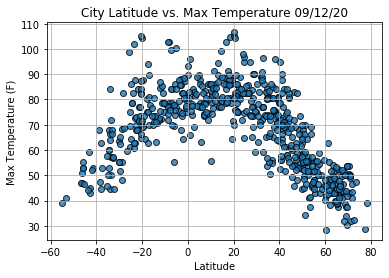

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

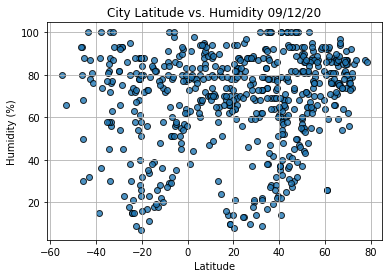

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

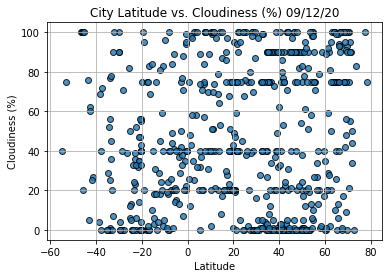

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

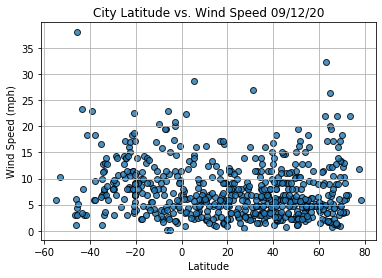

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
   
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
## row =df.loc[row_index]
index13=city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2020-09-12 17:01:30
Lat                         55.74
Lng                        -97.86
Max Temp                     42.8
Humidity                       81
Cloudiness                     75
Wind Speed                  16.11
Name: 13, dtype: object

In [25]:
#  row =df.loc[row_index]
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
594     True
595     True
596     True
597    False
598     True
Name: Lat, Length: 599, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sarkand,KZ,2020-09-12 17:01:28,45.41,79.92,65.30,27,97,14.79
3,Kysyl-Syr,RU,2020-09-12 17:01:28,63.90,122.76,48.94,88,100,1.74
4,Saskylakh,RU,2020-09-12 16:59:47,71.92,114.08,41.20,79,50,3.62
5,Elizabeth City,US,2020-09-12 17:01:28,36.29,-76.25,80.60,69,75,16.11
6,Barrow,US,2020-09-12 17:01:29,71.29,-156.79,32.00,92,90,9.17


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

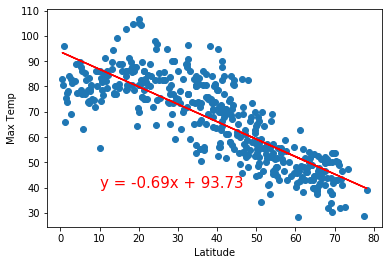

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,40))

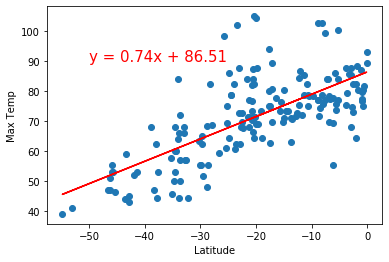

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

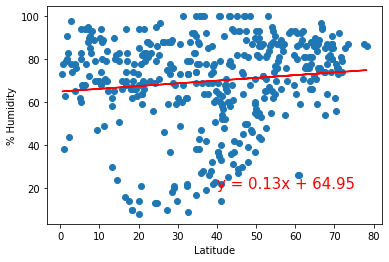

In [31]:
# Linear Regression on the Percent Humidity for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

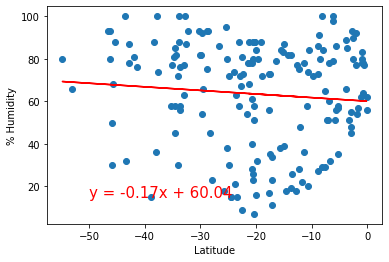

In [32]:
# Linear Regression on the Percent Humidity for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-50,15))

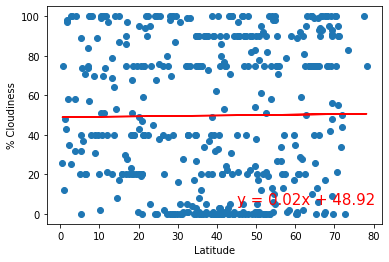

In [35]:
# Skill Drill
# Linear Regression on the Percent Cloudiness for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

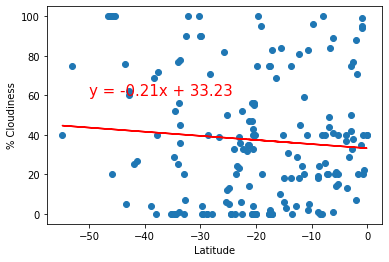

In [36]:
# Linear regression on the Percent Cloudiness of the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,60))

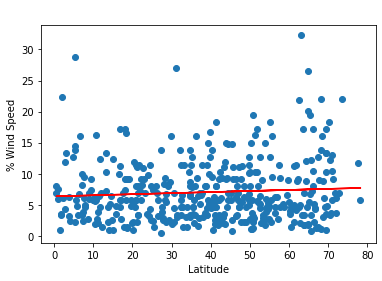

In [38]:
# Linear regression on the Wind Speed of the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(40,35))

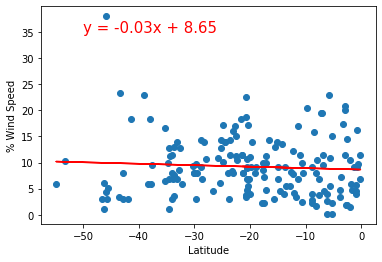

In [39]:
# Linear Regression on the Wind Speed of the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,35))